In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

In [705]:
data = pd.read_csv('data/中天社区.csv')
data

,desc,case_name,grid_name,FROM_UNIXTIME(a.create_time),reporter_name,reporter_mobile
0,小区垃圾随意堆放，导致环境很差。,其他工作,金山街道综合网格指挥中心,2022-08-30 17:21:02,刘*豪,173*****776
1,小区垃圾随意堆放，导致环境很差。,其他工作,金山街道综合网格指挥中心,2022-08-30 17:21:10,刘*豪,173*****776
2,深入开展餐饮场所安全隐患治理\n一、具体内容：\n9月-12月对辖区内使用燃气餐饮场所进行安...,消防安全,中天社区,2022-08-31 18:29:21,NaN,NaN
3,小区门口有居民乱丢垃圾,小区管理,领秀苑,2022-08-31 19:03:57,NaN,NaN
4,垃圾待清理,小区管理,金爵苑,2022-08-31 19:05:02,NaN,NaN
...,...,...,...,...,...,...
457,桔园四路142号陕西修脚店疫情防控期间违规营业，影响恶劣，希望有关部门严肃处理,其他工作,金爵苑,2022-12-05 12:54:13,黄*,137*****439
458,金桔路364号彭世修脚店疫情期间违规营业，且多次投诉完关停一会儿又开了，希望有关部门严肃处理,其他工作,金爵苑,2022-12-07 13:25:40,黄*,137*****439
459,小区外卖何时可以送上楼？公司都可以了！,其他工作,金爵苑,2022-12-07 15:31:35,郭*玲,195*****125
460,工作通知:为助推冬春火灾防控工作，请各社区（村）积极发动辖区社区、网格员、居民完成注册全民消...,其他工作,中天社区,2022-12-14 09:27:40,NaN,NaN


In [799]:
data.groupby('grid_name').count()
new_data = data.groupby('grid_name').count().sort_values(by='case_name',ascending=False)
new_data

,desc,case_name,FROM_UNIXTIME(a.create_time),reporter_name,reporter_mobile,new time
grid_name,,,,,,
天骄苑,86,86,86,29,29,86
中天社区,66,66,66,0,0,66
金爵苑,58,57,58,6,6,58
领秀苑,55,55,55,3,3,55
俊仕苑,52,52,52,8,8,52
综合组,44,44,44,44,44,44
爱唯大地幼儿园,39,39,39,1,1,39
云顶苑,29,29,29,2,2,29
金山街道综合网格指挥中心,14,14,14,14,14,14


In [988]:
data_new = [data['FROM_UNIXTIME(a.create_time)'][i] for i in range(len(data))]
new_time = [data_new[i].split()[0] for i in range(len(data))]
data['new time'] = new_time
new_time = set(new_time)
data_latest_1 = data[['new time','grid_name']]

data_latest_2 = data_latest_1[data_latest_1['grid_name']=='中天社区']
data_latest_2

sum_data = [i+1 for i in range(len(data_latest_2))]
data_latest_2['sum'] = sum_data
data_latest_1



C:\Users\郭士通\AppData\Local\Temp\ipykernel_3068\1055984606.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_latest_2['sum'] = sum_data


,new time,grid_name
0,2022-08-30,金山街道综合网格指挥中心
1,2022-08-30,金山街道综合网格指挥中心
2,2022-08-31,中天社区
3,2022-08-31,领秀苑
4,2022-08-31,金爵苑
...,...,...
457,2022-12-05,金爵苑
458,2022-12-07,金爵苑
459,2022-12-07,金爵苑
460,2022-12-14,中天社区


In [2]:
import pyecharts

In [3]:
print(pyecharts.__version__)

2.0.0


In [9]:
from pyecharts.charts import Map  # 注意这里与老版本pyecharts调用的区别
from pyecharts import options as opts
import random

In [10]:
data = pd.read_csv('data/中天社区.csv')

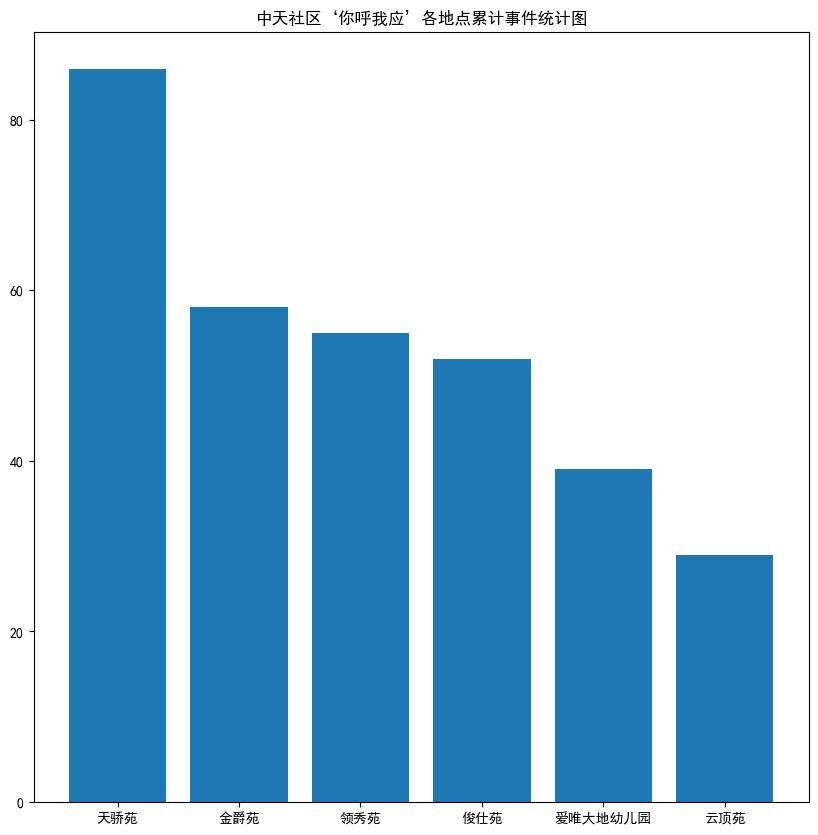

In [1329]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
neibourhood_name = ('天骄苑', '金爵苑', '领秀苑', '俊仕苑', 
                    '爱唯大地幼儿园', '云顶苑', '天骄苑38栋高层',
                   '云顶苑4栋高层', '其他')
event_number = [86, 58, 55, 52, 39, 29, 13, 1, 63]
plt.bar(waters, buy_number)
plt.title('中天社区‘你呼我应’各地点累计事件统计图')
plt.savefig('柱状图.png')
plt.show()


In [574]:
import folium
import numpy as np
import pandas as pd
import seaborn as sns
import webbrowser
from folium.plugins import HeatMap
from folium.plugins import FloatImage
from tkinter import *

In [1326]:
def getMapObject(centerLoc=[0, 0], baseLayerTitle='baseLayer'):

    m = folium.Map(location=centerLoc,
                    zoom_start=16,
                    control_scale=True,
                    control=False,
                    tiles=None
                    )

    folium.TileLayer(tiles='http://webrd02.is.autonavi.com/appmaptile?lang=zh_cn&size=1&scale=1&style=8&x={x}&y={y}&z={z}',
                        attr="&copy; <a href=http://ditu.amap.com/>高德地图</a>",
                        min_zoom=0,
                        max_zoom=25,
                        control=True,
                        show=True,
                        overlay=False,
                        name=baseLayerTitle
                        ).add_to(m)
    
    data_d = pd.read_csv('data/中天社区.csv') # get data about date
    posi = pd.read_csv('data/data_base.csv') # get data of position
    lat = np.array(posi['Latitude'][0:len(posi)])
    lon = np.array(posi['Lontitude'][0:len(posi)])
    name = np.array(posi['Name'][0:len(posi)])
    amount = np.array(posi['Num'][0:len(posi)],dtype=float)
    data_all = [[lon[i],lat[i],amount[i]] for i in range(len(posi))]     
    
    data_new = [data_d['FROM_UNIXTIME(a.create_time)'][i] for i in range(len(data_d))]
    new_time = [data_new[i].split()[0] for i in range(len(data_d))]
    
    sum_of_num = data_with_time['1']+data_with_time['2']+data_with_time['3']+data_with_time['4']\
    +data_with_time['5']+data_with_time['6']+data_with_time['7']+data_with_time['8']
     
    time = []
    for i in new_time:
        if not i in time:
            time.append(i)
    
    data_sum_time = pd.read_csv('data/data_time.csv')
    data_sum_time['9'] = sum_of_num
    data_sum_time['9'][0] = 1
    data_sum_time_realtime = []
    for i in range(73):
        data_sum_time_realtime.append([])
        for j in range(8):
            data_sum_time_realtime[i].append([posi['Lontitude'][j],posi['Latitude'][j],
                                          (float(list(data_sum_time.loc[i])[j]+0.001))/80])
    
    data_sum_time_accumulative = []
    for i in range(73):
        data_sum_time_accumulative.append([])
        for j in range(8):
            data_sum_time_accumulative[i].append([posi['Lontitude'][j],posi['Latitude'][j],
                                          3.7*(float(list(data_sum_time.loc[i])[j]+0.001))\
                                          /(float(list(data_sum_time.loc[i])[8]))])
    
    
    
    Heat_Map_all = plugins.HeatMap(data_all,name='Heat Map(all)',radius=40,
                               gradient={.1:'blue',.2:'green',.5:'yellow',.7:'orange',1:'red'})
    Heat_Map_all.add_to(m)
    
    Heat_Map_with_time_1 = plugins.HeatMapWithTime(data_sum_time_realtime,
                             name='Heat Map(time)(accumulative)',
                             index=time,    
                             auto_play=False,
                             radius=80,
                            gradient={.1:'blue',.2:'green',.5:'yellow',.7:'orange',1:'red'})
    Heat_Map_with_time_1.add_to(m)
    
    Heat_Map_with_time_2 = plugins.HeatMapWithTime(data_sum_time_accumulative,
                             name='Heat Map(time)(real_time)',
                             index=time,    
                             auto_play=False,
                             radius=80,
                            gradient={.1:'blue',.2:'green',.4:'yellow',.6:'orange',1:'red'})
    Heat_Map_with_time_2.add_to(m)
    
    
    for i in range(len(posi)):
        folium.Marker(location=[lon[i],lat[i]],
                  popup=folium.Popup(name[i], 
                                     parse_html=True, 
                                     max_width=100)
                     ).add_to(m)
  
    
    #FloatImage(image_file, left=0 ,bottom=10).add_to(m)
    
    m.add_child(folium.LatLngPopup()) # 增加经纬度查询功能
    
    #m.add_child(plugins.MeasureControl(position ='topleft')) # 增加测量尺功能
    
    folium.LayerControl().add_to(m)
    
    
    
    return m

In [1327]:
MAP = getMapObject(centerLoc=[26.0379,119.240061], baseLayerTitle='baseLayer')
MAP.save('map.html')
MAP

In [ ]:
&lat=26.037404,119.2454    &lat=26.037776,119.246321    &lat=26.038932,119.246254    &lat=26.038599,119.244868

In [1209]:
    data_d = pd.read_csv('data/中天社区.csv') # get data about date
    posi = pd.read_csv('data/data_base.csv') # get data of position
    lat = np.array(posi['Latitude'][0:len(posi)])
    lon = np.array(posi['Lontitude'][0:len(posi)])
    name = np.array(posi['Name'][0:len(posi)])
    amount = np.array(posi['Num'][0:len(posi)],dtype=float)
    data_all = [[lon[i],lat[i],amount[i]] for i in range(len(posi))]     
    
    data_new = [data_d['FROM_UNIXTIME(a.create_time)'][i] for i in range(len(data_d))]
    new_time = [data_new[i].split()[0] for i in range(len(data_d))]
    time = []
    for i in new_time:
        if not i in time:
            time.append(i)
    
    data_with_time = pd.read_csv('data/data_time.csv')
    
    data_with_time_test = []
    for i in range(73):
        data_with_time_test.append([])
        for j in range(8):
            data_with_time_test[i].append([posi['Lontitude'][j],posi['Latitude'][j],
                                           float(list(data_with_time.loc[i])[j])])
    
    dddd = data_with_time['1']+data_with_time['2']+data_with_time['3']+data_with_time['4']\
    +data_with_time['5']+data_with_time['6']+data_with_time['7']+data_with_time['8']
    data_with_time['9'] = dddd
    data_with_time['9'][0] = 1
    data_with_time

,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,0,0,0,1
1,0,2,1,0,0,0,0,0,3
2,1,3,1,1,0,0,0,0,6
3,2,4,4,2,1,0,0,0,13
4,5,5,5,2,2,0,0,0,19
...,...,...,...,...,...,...,...,...,...
68,85,58,55,52,39,29,13,1,332
69,85,58,55,52,39,29,13,1,332
70,85,58,55,52,39,29,13,1,332
71,85,58,55,52,39,29,13,1,332
